In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from collections import defaultdict
from statsmodels.stats.proportion import proportions_ztest, proportions_chisquare
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import statistics
import string
from thefuzz import fuzz
import seaborn as sns
from dython import nominal
from dython.nominal import associations
from sklearn.model_selection import train_test_split
from scipy.stats import f

/Users/shavit/opt/anaconda3/envs/env_full/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/shavit/opt/anaconda3/envs/env_full/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/shavit/opt/anaconda3/envs/env_full/lib/python3.9/site-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# federer
df_federer_baseline = pd.read_csv("New Forms/Federer_Baseline_New.csv")
df_federer_question = pd.read_csv("New Forms/Federer_Question_only_New.csv")
df_federer_narrative = pd.read_csv("New Forms/Federer_Narrative_New.csv")

df_federer_uniqueness = pd.read_csv("New Forms/Federer_Uniqueness_New.csv")
df_federer_benefit = pd.read_csv("New Forms/Federer_Benefit_to_others_New.csv")

# health- salt
df_salt_baseline = pd.read_csv("New Forms/Salt_Baseline_New.csv")
df_salt_question = pd.read_csv("New Forms/Salt_Question_only_New.csv")
df_salt_narrative = pd.read_csv("New Forms/Salt_Narrative_New.csv")

In [3]:
# federer
quit_index_baseline = df_federer_baseline["quit_index"].to_list()
quit_index_question = df_federer_question["quit_index"].to_list()
quit_index_narrative = df_federer_narrative["quit_index"].to_list()

quit_index_uniqueness = df_federer_uniqueness["quit_index"].to_list()
quit_index_benefit = df_federer_benefit["quit_index"].to_list()

# health- salt
quit_index_salt_baseline = df_salt_baseline["quit_index"].to_list()
quit_index_salt_question = df_salt_question["quit_index"].to_list()
quit_index_salt_narrative = df_salt_narrative["quit_index"].to_list()

# Curiosity

## Hypothesis 1

### One Way ANOVA Test

In [4]:
anova_one_way = f_oneway(quit_index_baseline, quit_index_question, quit_index_narrative)
F_stat, pval = anova_one_way
print(f'the F stat is: {F_stat} and the pval is: {pval}')
# print(anova_one_way)

the F stat is: 1.868761809407233 and the pval is: 0.17242749168064814


### Histogram

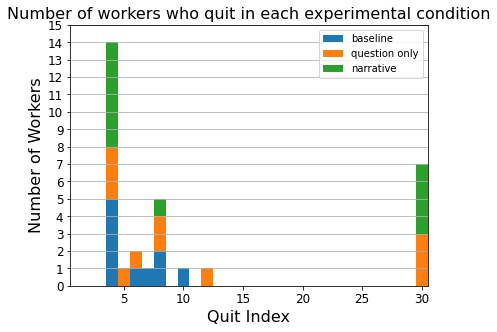

In [5]:
plt.figure(figsize=(6.4, 4.8))
plt.xlabel("Quit Index", fontsize=16)
plt.ylabel("Number of Workers", fontsize=16)
plt.xticks(np.arange(0, 31, step=5), fontsize=12)
plt.yticks(np.arange(0, 20, step=1), fontsize=12)
plt.ylim(top=15, bottom=0)
types = ['baseline', 'question only', 'narrative']
n, bins, patches = plt.hist([quit_index_baseline, quit_index_question, quit_index_narrative], bins=range(1,32), align='left', 
                            rwidth=1, stacked=True, density=False, label=types)
plt.title('Number of workers who quit in each experimental condition', fontsize=16)
plt.legend()
axes = plt.gca()
axes.yaxis.grid()
plt.margins(0)
plt.show();

### Retention Curves

In [6]:
zipped_lists = zip(quit_index_baseline, quit_index_question, quit_index_narrative)
quit_index_sum = defaultdict(lambda:0)
quit_index_sum_baseline = defaultdict(lambda:0)
quit_index_sum_question = defaultdict(lambda:0)
quit_index_sum_narrative = defaultdict(lambda:0)
for (x, y, z) in zipped_lists:
    quit_index_sum[x] += 1
    quit_index_sum[y] += 1
    quit_index_sum[z] += 1
for x in quit_index_baseline:
    quit_index_sum_baseline[x] += 1
for y in quit_index_question:
    quit_index_sum_question[y] += 1
for z in quit_index_narrative:
    quit_index_sum_narrative[z] += 1

list_quit_index_sum = []
for i in range(1,31):
    list_quit_index_sum.append(quit_index_sum[i])

print(f"{list_quit_index_sum=}")
print(f'most common quiting indexes overall are: 4,6,8')
print(f'baseline: 4- {quit_index_sum_baseline[4]}, 6- {quit_index_sum_baseline[6]}, 8- {quit_index_sum_baseline[8]}')
print(f'question only: 4- {quit_index_sum_question[4]}, 6- {quit_index_sum_question[6]}, 8- {quit_index_sum_question[8]}')
print(f'narrative: 4- {quit_index_sum_narrative[4]}, 6- {quit_index_sum_narrative[6]}, 8- {quit_index_sum_narrative[8]}')
# print(quit_index_sum_baseline)
# print(quit_index_sum_question)
# print(quit_index_sum_narrative)

list_quit_index_baseline_prec = []
list_quit_index_question_prec = []
list_quit_index_narrative_prec = []

workers_num_baseline = len(df_federer_baseline)
workers_num_question = len(df_federer_question)
workers_num_narrative = len(df_federer_narrative)

for i in range(1,31):
    if i>1:
        list_quit_index_baseline_prec.append((quit_index_sum_baseline[i]+list_quit_index_baseline_prec[-1]))
        list_quit_index_question_prec.append((quit_index_sum_question[i]+list_quit_index_question_prec[-1]))
        list_quit_index_narrative_prec.append((quit_index_sum_narrative[i]+list_quit_index_narrative_prec[-1]))

    else:
        list_quit_index_baseline_prec.append(quit_index_sum_baseline[i])
        list_quit_index_question_prec.append(quit_index_sum_question[i])
        list_quit_index_narrative_prec.append(quit_index_sum_narrative[i])

# fixing lists: moving all cells' values to the right- we have in each cell the num of workers that their quit index is the 
# number of the cell (i.e. the number of participants who completed #cell tasks included), so they still did the current task 
# and should be included in the percentage of workers who continue working on the task
list_quit_index_baseline_prec_fix = [0]
list_quit_index_question_prec_fix = [0]
list_quit_index_narrative_prec_fix = [0]
for i in range(0, len(list_quit_index_baseline_prec) - 1):
    list_quit_index_baseline_prec_fix.append(list_quit_index_baseline_prec[i])
    list_quit_index_question_prec_fix.append(list_quit_index_question_prec[i])
    list_quit_index_narrative_prec_fix.append(list_quit_index_narrative_prec[i])

for i in range(29):
    list_quit_index_baseline_prec_fix[i] = 100 - (list_quit_index_baseline_prec_fix[i]/workers_num_baseline) * 100
    list_quit_index_question_prec_fix[i] = 100 - (list_quit_index_question_prec_fix[i]/workers_num_question) * 100
    list_quit_index_narrative_prec_fix[i] = 100 - (list_quit_index_narrative_prec_fix[i]/workers_num_narrative) * 100

list_quit_index_baseline_prec_fix[-1] = list_quit_index_baseline_prec_fix[-2]
list_quit_index_question_prec_fix[-1] = list_quit_index_question_prec_fix[-2]
list_quit_index_narrative_prec_fix[-1] = list_quit_index_narrative_prec_fix[-2]
print()
print(f'Remaining percantages for Baseline: \n'
      f'{[round(i, 3) for i in list_quit_index_baseline_prec_fix]}')
print(f'Remaining percantages for Question: \n'
      f'{[round(i, 3) for i in list_quit_index_question_prec_fix]}')
print(f'Remaining percantages for Narrative: \n'
      f'{[round(i, 3) for i in list_quit_index_narrative_prec_fix]}')

list_quit_index_sum=[0, 0, 0, 14, 1, 2, 1, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6]
most common quiting indexes overall are: 4,6,8
baseline: 4- 5, 6- 1, 8- 2
question only: 4- 3, 6- 1, 8- 2
narrative: 4- 6, 6- 0, 8- 1

Remaining percantages for Baseline: 
[100.0, 100.0, 100.0, 100.0, 50.0, 50.0, 40.0, 30.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Remaining percantages for Question: 
[100.0, 100.0, 100.0, 100.0, 72.727, 63.636, 54.545, 54.545, 36.364, 36.364, 36.364, 36.364, 27.273, 27.273, 27.273, 27.273, 27.273, 27.273, 27.273, 27.273, 27.273, 27.273, 27.273, 27.273, 27.273, 27.273, 27.273, 27.273, 27.273, 27.273]
Remaining percantages for Narrative: 
[100.0, 100.0, 100.0, 100.0, 45.455, 45.455, 45.455, 45.455, 36.364, 36.364, 36.364, 36.364, 36.364, 36.364, 36.364, 36.364, 36.364, 36.364, 36.364, 36.364, 36.364, 36.364, 36.364, 36.364, 36.364, 36.364, 36.364, 36.364, 36.364, 36.364]


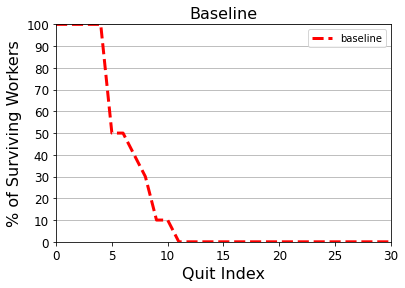

In [7]:
indexes = [i for i in range(0,31)]
plt.xticks(np.arange(0, 31, step=5), fontsize=12)
plt.yticks(np.arange(0, 110, step=10), fontsize=12)
plt.plot(indexes, [100] + list_quit_index_baseline_prec_fix, label='baseline', color='r', linestyle='dashed', linewidth=3)
plt.xlabel('Quit Index', fontsize=16)
plt.ylabel('% of Surviving Workers', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Baseline', fontsize=16)
plt.legend()
axes = plt.gca()
axes.yaxis.grid()
plt.margins(0)
plt.show();

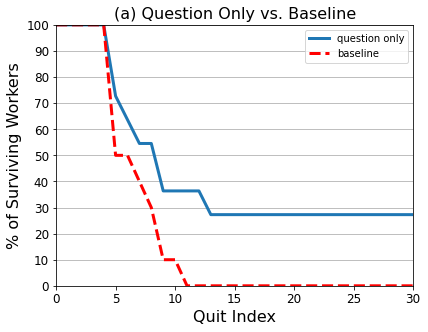

In [8]:
fig, ax = plt.subplots(figsize=(6.4, 4.8))
plt.xticks(np.arange(0, 31, step=5), fontsize=12)
plt.yticks(np.arange(0, 110, step=10), fontsize=12)
plt.ylim(top=100, bottom=0)
plt.plot(indexes, [100] + list_quit_index_question_prec_fix,  label='question only', linewidth=3)
plt.plot(indexes, [100] + list_quit_index_baseline_prec_fix, label='baseline', color='r', linestyle='dashed', linewidth=3)
plt.xlabel('Quit Index', fontsize=16)
plt.ylabel('% of Surviving Workers', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('(a) Question Only vs. Baseline', fontsize=16)
plt.legend()
axes = plt.gca()
axes.yaxis.grid()
plt.margins(0)
plt.show();

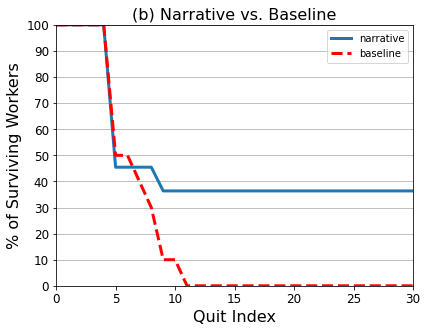

In [9]:
fig, ax = plt.subplots(figsize=(6.4, 4.8))
plt.xticks(np.arange(0, 31, step=5), fontsize=12)
plt.yticks(np.arange(0, 110, step=10), fontsize=12)
plt.plot(indexes, [100] + list_quit_index_narrative_prec_fix, label='narrative', linewidth=3)
plt.plot(indexes, [100] + list_quit_index_baseline_prec_fix, label='baseline', color='r', linestyle='dashed', linewidth=3)
plt.xlabel('Quit Index', fontsize=16)
plt.ylabel('% of Surviving Workers', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('(b) Narrative vs. Baseline', fontsize=16)
plt.legend()
axes = plt.gca()
axes.yaxis.grid()
plt.margins(0)
plt.show();

In [10]:
mean = df_federer_baseline['quit_index'].mean()
print (f'Baseline mean of quit indexes is: {mean:.5}')
std = df_federer_baseline['quit_index'].std()
print (f'Baseline std of quit indexes is: {std:.5}')
median = df_federer_baseline['quit_index'].median()
print (f'Baseline median of quit indexes is: {median}')

Baseline mean of quit indexes is: 5.9
Baseline std of quit indexes is: 2.2336
Baseline median of quit indexes is: 5.0


In [11]:
mean = df_federer_question['quit_index'].mean()
print (f'Question Only mean of quit indexes is: {mean:.6}')
std = df_federer_question['quit_index'].std()
print (f'Question Only std of quit indexes is: {std:.6}')
median = df_federer_question['quit_index'].median()
print (f'Question Only median of quit indexes is: {median}')

Question Only mean of quit indexes is: 12.8182
Question Only std of quit indexes is: 11.2855
Question Only median of quit indexes is: 8.0


In [12]:
mean = df_federer_narrative['quit_index'].mean()
print (f'Narrative mean of quit indexes is: {mean:.6}')
std = df_federer_narrative['quit_index'].std()
print (f'Narrative std of quit indexes is: {std:.6}')
median = df_federer_narrative['quit_index'].median()
print (f'Narrative median of quit indexes is: {median}')

Narrative mean of quit indexes is: 13.8182
Narrative std of quit indexes is: 12.8827
Narrative median of quit indexes is: 4.0


## Hypothesis 2

### Two Sided Proportion Test

In [13]:
# baseline
workers_num_baseline = len(df_federer_baseline)
comp_workers_baseline = len(df_federer_baseline[df_federer_baseline['quit_index'] == 30])
percentage_comp_baseline = comp_workers_baseline / workers_num_baseline * 100 
print (f'the percentage of workers how completed al 30 task in the baseline version is: {percentage_comp_baseline}%' )

# question only
workers_num_question = len(df_federer_question)
comp_workers_question = len(df_federer_question[df_federer_question['quit_index'] == 30])
percentage_comp_question = comp_workers_question / workers_num_question * 100
print (f'the percentage of workers how completed al 30 task in the question only version is: {percentage_comp_question}%' )

# narrative
workers_num_narrative = len(df_federer_narrative)
comp_workers_narrative = len(df_federer_narrative[df_federer_narrative['quit_index'] == 30])
percentage_comp_narrative = comp_workers_narrative / workers_num_narrative * 100
print (f'the percentage of workers how completed al 30 task in the narrative version is: {percentage_comp_narrative}%' )

the percentage of workers how completed al 30 task in the baseline version is: 0.0%
the percentage of workers how completed al 30 task in the question only version is: 27.27272727272727%
the percentage of workers how completed al 30 task in the narrative version is: 36.36363636363637%


In [14]:
# pairwise test: question only compared to the  baseline
counts =  [comp_workers_baseline, comp_workers_question]
nobs = [workers_num_baseline, workers_num_question]
zstat, pval = proportions_ztest(counts, nobs)
print(f'the stat is: {zstat} and the pval is: {pval}')

the stat is: -1.7837651700316892 and the pval is: 0.07446183141740552


In [15]:
# pairwise test: narrative compared to the  baseline
counts =  [comp_workers_baseline, comp_workers_narrative]
nobs = [workers_num_baseline, workers_num_narrative]
zstat, pval = proportions_ztest(counts, nobs)
print(f'the stat is: {zstat} and the pval is: {pval}')

the stat is: -2.1194288404250963 and the pval is: 0.03405424161767096


In [16]:
# joined test: question only and narrative compared to the  baseline
counts =  [comp_workers_baseline, comp_workers_question, comp_workers_narrative]
nobs = [workers_num_baseline, workers_num_question, workers_num_narrative]

chi2stat, pval, table = proportions_chisquare(counts, nobs)
print(f'the chi2stat is: {chi2stat} and the pval is: {pval}')
# print(table)

the chi2stat is: 4.338701298701299 and the pval is: 0.1142517822975839


### GLM

In [17]:
# adding new binary completed column
df_federer_baseline['completed'] = np.where(df_federer_baseline['quit_index'] == 30, 1, 0)
df_federer_question['completed'] = np.where(df_federer_question['quit_index'] == 30, 1, 0)
df_federer_narrative['completed'] = np.where(df_federer_narrative['quit_index'] == 30, 1, 0)

# Enjoyment column
df_federer_baseline['enjoyment_avg'] = df_federer_baseline.apply(lambda x: ((7 - x['enjoyment_1']) + x['enjoyment_2'] + 
                                                                            x['enjoyment_3'] + (7 - x['enjoyment_4'])) / 4, 
                                                                 axis=1)

df_federer_question['enjoyment_avg'] = df_federer_question.apply(lambda x: ((7 - x['enjoyment_1']) + x['enjoyment_2'] + 
                                                                            x['enjoyment_3'] + (7 - x['enjoyment_4'])) / 4, 
                                                                 axis=1)

df_federer_narrative['enjoyment_avg'] = df_federer_narrative.apply(lambda x: ((7 - x['enjoyment_1']) + x['enjoyment_2'] + 
                                                                            x['enjoyment_3'] + (7 - x['enjoyment_4'])) / 4, 
                                                                 axis=1)

# Competence column
df_federer_baseline['competence_avg'] = df_federer_baseline.apply(lambda x: (x['competence_1'] + x['competence_2'] + 
                                                                              (7 - x['competence_3'])) / 3, 
                                                                 axis=1)

df_federer_question['competence_avg'] = df_federer_question.apply(lambda x: (x['competence_1'] + x['competence_2'] + 
                                                                              (7 - x['competence_3'])) / 3, 
                                                                 axis=1)

df_federer_narrative['competence_avg'] = df_federer_narrative.apply(lambda x: (x['competence_1'] + x['competence_2'] + 
                                                                              (7 - x['competence_3'])) / 3, 
                                                                 axis=1)

# Effort column
df_federer_baseline['effort_avg'] = df_federer_baseline.apply(lambda x: ((7 - x['effort_1']) + x['effort_2']) / 2, 
                                                                 axis=1)

df_federer_question['effort_avg'] = df_federer_question.apply(lambda x: ((7 - x['effort_1']) + x['effort_2']) / 2, 
                                                                 axis=1)

df_federer_narrative['effort_avg'] = df_federer_narrative.apply(lambda x: ((7 - x['effort_1']) + x['effort_2']) / 2, 
                                                                 axis=1)

In [18]:
# creating the dataframe for glm
df_federer_baseline['condition'] = 'federer_baseline'
df_federer_question['condition'] = 'federer_question'
df_federer_narrative['condition'] = 'federer_narrative'

desired_columns = ['completed', 'condition', 'enjoyment_avg', 'competence_avg', 'effort_avg']
df_federer_baseline_to_glm = df_federer_baseline[desired_columns].copy()
df_federer_question_to_glm = df_federer_question[desired_columns].copy()
df_federer_narrative_to_glm = df_federer_narrative[desired_columns].copy()

glm_df = pd.concat([df_federer_baseline_to_glm, df_federer_question_to_glm, df_federer_narrative_to_glm]).reset_index()
glm_df.head()

,index,completed,condition,enjoyment_avg,competence_avg,effort_avg
0,0,0,federer_baseline,1.75,2.000000,6.0
1,1,0,federer_baseline,6.50,6.666667,6.5
2,2,0,federer_baseline,2.00,3.000000,5.0
3,3,0,federer_baseline,0.75,3.666667,4.0
4,4,0,federer_baseline,2.25,4.666667,3.5


In [19]:
formula = 'completed ~ C(condition)+enjoyment_avg+competence_avg+effort_avg'
model = smf.glm(formula=formula, data=glm_df, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              completed   No. Observations:                   32
Model:                            GLM   Df Residuals:                       26
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.838
Date:                Tue, 01 Mar 2022   Deviance:                       25.676
Time:                        18:57:49   Pearson chi2:                     21.0
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

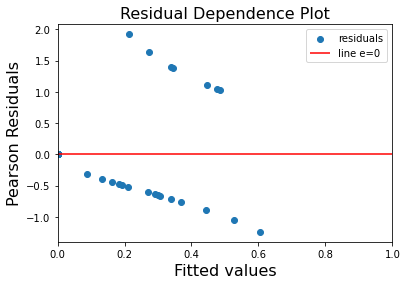

In [20]:
yhat = result.mu
# from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots()

ax.scatter(yhat, result.resid_pearson, label='residuals')
ax.hlines(0, 0, 1, color='red', label='line e=0')
ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot', fontsize=16)
ax.set_ylabel('Pearson Residuals', fontsize=16)
ax.set_xlabel('Fitted values', fontsize=16)
ax.legend();

In [21]:
# resid = result.resid_deviance.copy()
# from statsmodels import graphics
# graphics.gofplots.qqplot(resid, line='r')

In [22]:
# Hosmer-Lemeshow Goodness of Fit Function
def chisq(data, groupby, obs,Exp):
    chisq_tbl=data.groupby(groupby).apply(lambda x: pd.Series([
        np.size(x[obs]),
        np.size(x[Exp][x[Exp]==1]),
        np.size(x[Exp][x[Exp]==0]),   
        np.sum(x[obs]),
        (np.sum(1-x[obs]))      
        ],
        index=(["cnt", "Obs_Resp", "Obs_Non_resp", 
               "Exp_Resp", "Exp_Non_Resp"])
        )).reset_index()
    chisq_tbl=chisq_tbl.sort_values(by=groupby,ascending=False)
    chisq_value = (
        ((chisq_tbl["Obs_Resp"]-chisq_tbl["Exp_Resp"])**2
              /chisq_tbl["Exp_Resp"])+
        ((chisq_tbl["Obs_Non_resp"]-chisq_tbl["Exp_Non_Resp"])**2
              /chisq_tbl["Exp_Non_Resp"])).sum()
    
    g = len(data["decile"].value_counts())
    
    
    chisq_tbl = chisq_tbl.round(0).astype(int)
    import scipy
    pvalue=scipy.stats.chi2.pdf(chisq_value , g-2)
    return({"Chisq_Table":chisq_tbl,
            "hosmerlem": {"degree_of_freedom": g-2,
                          "X^2":round(chisq_value,3),
                          "p_value":round(pvalue, 5)}})

In [23]:
# adding needed columns for Hosmer-Lemeshow Goodness of Fit
glm_df["prob"] = result.predict(glm_df)
glm_df['decile']=pd.qcut(glm_df.prob, 10, labels=False)

# test
chisq_test = chisq(glm_df, "decile", "prob", "completed")
# chisq_test["Chisq_Table"]
chisq_test["hosmerlem"]

{'degree_of_freedom': 8, 'X^2': 6.709, 'p_value': 0.10987}

## Hypothesis 3

In [24]:
def calculate_error_rates(df):
    df_org = pd.read_csv("Articles/ordered_Federer.csv")
    org_trans = df_org["sentence"].tolist()
    
    transcriptions = {}  # key=user_index, value=list_of_transcriptions
    for index, row in df.iterrows():
        tran = []
        for i in range(1,31):
            if not isinstance(row['transcription_'+str(i)], float):
                tran.append(row['transcription_'+str(i)].translate(str.maketrans('', '', string.punctuation)).lower())
            transcriptions[index] = tran
    
    error_rate = []
    for user, trans_lst in enumerate(transcriptions.values()):
        sum_ratio = 0
        for i, trans in enumerate(trans_lst):
            user_trans = trans
            real_trans = org_trans[i]
            sum_ratio += fuzz.ratio(user_trans, real_trans)/100
        error_rate.append(1-sum_ratio/len(trans_lst))
        # print("error rate for user", user, "is:", 1-sum_ratio/len(trans_lst))
    return error_rate

In [25]:
error_rates_baseline = calculate_error_rates(df_federer_baseline)
error_rates_question = calculate_error_rates(df_federer_question)
error_rates_narrative = calculate_error_rates(df_federer_narrative)
error_rates_uniqueness = calculate_error_rates(df_federer_uniqueness)
error_rates_benefit = calculate_error_rates(df_federer_benefit)

In [26]:
print("Median for baseline=", round(100*statistics.median(error_rates_baseline), 3))
print("Median for question=", round(100*statistics.median(error_rates_question), 3))
print("Median for narrative=", round(100*statistics.median(error_rates_narrative), 3))
print("Median for uniqueness=", round(100*statistics.median(error_rates_uniqueness), 3))
print("Median for benefit=", round(100*statistics.median(error_rates_benefit), 3))

Median for baseline= 4.464
Median for question= 4.75
Median for narrative= 5.0
Median for uniqueness= 3.0
Median for benefit= 5.267


In [27]:
print("Mean for baseline=", round(100*statistics.mean(error_rates_baseline), 3))
print("Mean for question=", round(100*statistics.mean(error_rates_question), 3))
print("Mean for narrative=", round(100*statistics.mean(error_rates_narrative), 3))
print("Mean for uniqueness=", round(100*statistics.mean(error_rates_uniqueness), 3))
print("Mean for benefit=", round(100*statistics.mean(error_rates_benefit), 3))

Mean for baseline= 8.582
Mean for question= 5.962
Mean for narrative= 8.288
Mean for uniqueness= 3.914
Mean for benefit= 5.117


### Kruskal-Wallis Test

In [28]:
chi2stat,pval = stats.kruskal(error_rates_baseline, error_rates_question, error_rates_narrative)
print(f'the chi2stat is: {chi2stat} and the pval is: {pval}')

the chi2stat is: 0.5958020802080217 and the pval is: 0.7423748014459695


Meanwhile, we also notice that the error rate in all experimental conditions is already very low, which implies that the space for performance improvement can be very limited.

## Hypothesis 5

### Histogram

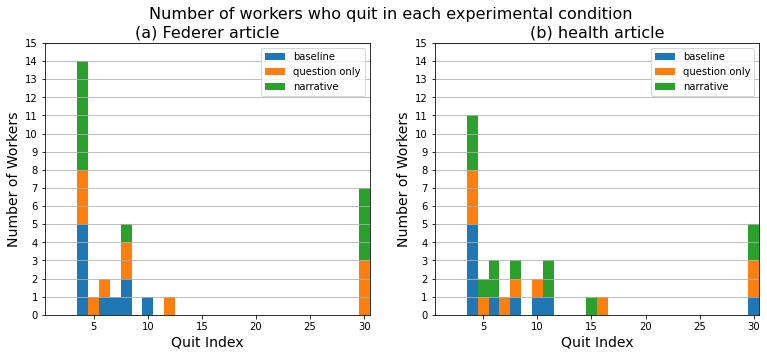

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12.8, 5))
fig.suptitle('Number of workers who quit in each experimental condition', fontsize=16)
ax[1].set_title('(b) health article', fontsize=16)
ax[1].set_xlabel("Quit Index", fontsize=14)
ax[1].set_ylabel("Number of Workers", fontsize=14)
ax[1].set_xticks(np.arange(0, 31, step=5))
ax[1].set_yticks(np.arange(0, 20, step=1))
ax[1].set_ylim(top=15, bottom=0)
types = ['baseline', 'question only', 'narrative']
n, bins, patches = ax[1].hist([quit_index_salt_baseline, quit_index_salt_question, quit_index_salt_narrative], bins=range(1,32), 
                            align='left', rwidth=1, stacked=True, density=False, label=types)
ax[1].legend()
ax[1].grid(axis='y')
ax[1].margins(0)

ax[0].set_title('(a) Federer article', fontsize=16)
ax[0].set_xlabel("Quit Index", fontsize=14)
ax[0].set_ylabel("Number of Workers", fontsize=14)
ax[0].set_xticks(np.arange(0, 31, step=5))
ax[0].set_yticks(np.arange(0, 20, step=1))
ax[0].set_ylim(top=15, bottom=0)
types = ['baseline', 'question only', 'narrative']
n, bins, patches = ax[0].hist([quit_index_baseline, quit_index_question, quit_index_narrative], bins=range(1,32), align='left', 
                            rwidth=1, stacked=True, density=False, label=types)
ax[0].legend()
ax[0].grid(axis='y')
ax[0].margins(0)

plt.show();

In [30]:
# baseline
workers_num_baseline = len(df_salt_baseline)
comp_workers_baseline = len(df_salt_baseline[df_salt_baseline['quit_index'] == 30])
percentage_comp_baseline = comp_workers_baseline / workers_num_baseline * 100 
print (f'the percentage of workers how completed all 30 task in the baseline version is: {percentage_comp_baseline}%' )

# question only
workers_num_question = len(df_salt_question)
comp_workers_question = len(df_salt_question[df_salt_question['quit_index'] == 30])
percentage_comp_question = comp_workers_question / workers_num_question * 100
print (f'the percentage of workers how completed all 30 task in the question only version is: {percentage_comp_question}%' )

# narrative
workers_num_narrative = len(df_salt_narrative)
comp_workers_narrative = len(df_salt_narrative[df_salt_narrative['quit_index'] == 30])
percentage_comp_narrative = comp_workers_narrative / workers_num_narrative * 100
print (f'the percentage of workers how completed all 30 task in the narrative version is: {percentage_comp_narrative}%' )

the percentage of workers how completed all 30 task in the baseline version is: 10.0%
the percentage of workers how completed all 30 task in the question only version is: 20.0%
the percentage of workers how completed all 30 task in the narrative version is: 16.666666666666664%


### GLM

In [31]:
# adding new binary completed column
df_salt_baseline['completed'] = np.where(df_salt_baseline['quit_index'] == 30, 1, 0)
df_salt_question['completed'] = np.where(df_salt_question['quit_index'] == 30, 1, 0)
df_salt_narrative['completed'] = np.where(df_salt_narrative['quit_index'] == 30, 1, 0)

# Enjoyment column
df_salt_baseline['enjoyment_avg'] = df_salt_baseline.apply(lambda x: ((7 - x['enjoyment_1']) + x['enjoyment_2'] + 
                                                                      x['enjoyment_3'] + (7 - x['enjoyment_4'])) / 4, 
                                                           axis=1)

df_salt_question['enjoyment_avg'] = df_salt_question.apply(lambda x: ((7 - x['enjoyment_1']) + x['enjoyment_2'] + 
                                                                      x['enjoyment_3'] + (7 - x['enjoyment_4'])) / 4,
                                                           axis=1)

df_salt_narrative['enjoyment_avg'] = df_salt_narrative.apply(lambda x: ((7 - x['enjoyment_1']) + x['enjoyment_2'] + 
                                                                        x['enjoyment_3'] + (7 - x['enjoyment_4'])) / 4, 
                                                             axis=1)

# Competence column
df_salt_baseline['competence_avg'] = df_salt_baseline.apply(lambda x: (x['competence_1'] + x['competence_2'] + 
                                                                       (7 - x['competence_3'])) / 3, 
                                                            axis=1)

df_salt_question['competence_avg'] = df_salt_question.apply(lambda x: (x['competence_1'] + x['competence_2'] + 
                                                                       (7 - x['competence_3'])) / 3, 
                                                            axis=1)

df_salt_narrative['competence_avg'] = df_salt_narrative.apply(lambda x: (x['competence_1'] + x['competence_2'] + 
                                                                         (7 - x['competence_3'])) / 3,
                                                              axis=1)

# Effort column
df_salt_baseline['effort_avg'] = df_salt_baseline.apply(lambda x: ((7 - x['effort_1']) + x['effort_2']) / 2, axis=1)

df_salt_question['effort_avg'] = df_salt_question.apply(lambda x: ((7 - x['effort_1']) + x['effort_2']) / 2, axis=1)

df_salt_narrative['effort_avg'] = df_salt_narrative.apply(lambda x: ((7 - x['effort_1']) + x['effort_2']) / 2, axis=1)

### New Way

In [32]:
# creating the dataframe for glm
df_federer_baseline.replace({'condition': {'federer_baseline': 'baseline'}}, inplace=True)
df_federer_question.replace({'condition': {'federer_question': 'question'}}, inplace=True)
df_federer_narrative.replace({'condition': {'federer_narrative': 'narrative'}}, inplace=True)

df_federer_baseline['article'] = 'federer'
df_federer_question['article'] = 'federer'
df_federer_narrative['article'] = 'federer'


df_salt_baseline['condition'] = 'baseline'
df_salt_question['condition'] = 'question'
df_salt_narrative['condition'] = 'narrative'

df_salt_baseline['article'] = 'salt'
df_salt_question['article'] = 'salt'
df_salt_narrative['article'] = 'salt'

desired_columns = ['completed', 'condition', 'article', 'enjoyment_avg', 'competence_avg', 'effort_avg']
df_federer_baseline_to_glm = df_federer_baseline[desired_columns].copy()
df_federer_question_to_glm = df_federer_question[desired_columns].copy()
df_federer_narrative_to_glm = df_federer_narrative[desired_columns].copy()

df_salt_baseline_to_glm = df_salt_baseline[desired_columns].copy()
df_salt_question_to_glm = df_salt_question[desired_columns].copy()
df_salt_narrative_to_glm = df_salt_narrative[desired_columns].copy()

glm_df = pd.concat([df_federer_baseline_to_glm, df_federer_question_to_glm, df_federer_narrative_to_glm, 
                   df_salt_baseline_to_glm, df_salt_question_to_glm, df_salt_narrative_to_glm]).reset_index()
glm_df

,index,completed,condition,article,enjoyment_avg,competence_avg,effort_avg
0,0,0,baseline,federer,1.75,2.000000,6.0
1,1,0,baseline,federer,6.50,6.666667,6.5
2,2,0,baseline,federer,2.00,3.000000,5.0
3,3,0,baseline,federer,0.75,3.666667,4.0
4,4,0,baseline,federer,2.25,4.666667,3.5
...,...,...,...,...,...,...,...
59,7,0,narrative,salt,3.50,3.666667,4.5
60,8,0,narrative,salt,1.75,3.333333,6.0
61,9,1,narrative,salt,4.50,3.000000,6.0
62,10,0,narrative,salt,5.00,5.333333,5.5


In [33]:
formula = 'completed ~ C(condition)*C(article)+C(article)+enjoyment_avg+competence_avg+effort_avg'
model = smf.glm(formula=formula, data=glm_df, family=sm.families.Binomial())
result2 = model.fit()
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              completed   No. Observations:                   64
Model:                            GLM   Df Residuals:                       55
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25.104
Date:                Tue, 01 Mar 2022   Deviance:                       50.207
Time:                        18:57:50   Pearson chi2:                     52.3
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

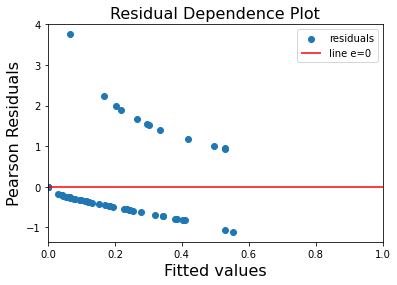

In [34]:
yhat = result2.mu
# from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots()

ax.scatter(yhat, result2.resid_pearson, label='residuals')
ax.hlines(0, 0, 1, color='red', label='line e=0')
ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot', fontsize=16)
ax.set_ylabel('Pearson Residuals', fontsize=16)
ax.set_xlabel('Fitted values', fontsize=16)
ax.legend();

In [35]:
# adding needed columns for Hosmer-Lemeshow Goodness of Fit
glm_df["prob"] = result2.predict(glm_df)
glm_df['decile']=pd.qcut(glm_df.prob, 10, labels=False)

# test
chisq_test = chisq(glm_df, "decile", "prob", "completed")
# chisq_test["Chisq_Table"]
chisq_test["hosmerlem"]

{'degree_of_freedom': 8, 'X^2': 10.664, 'p_value': 0.06107}

# Uniqueness and Benefit to others intervention

## Hypothesis 6

### One Way ANOVA Test

In [36]:
# uniqueness
anova_one_way = f_oneway(quit_index_baseline, quit_index_uniqueness)
F_stat, pval = anova_one_way
print(f'the F stat is: {F_stat} and the pval is: {pval}')

the F stat is: 3.244183415860563 and the pval is: 0.0894423126843747


### Histogram

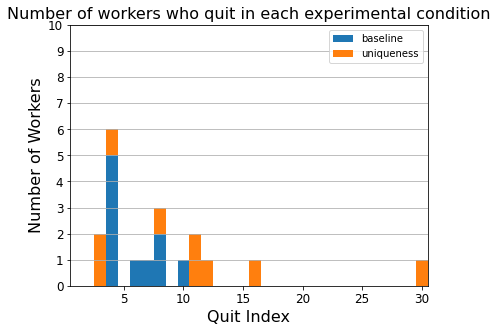

In [37]:
plt.figure(figsize=(6.4, 4.8))
plt.xlabel("Quit Index", fontsize=16)
plt.ylabel("Number of Workers", fontsize=16)
plt.xticks(np.arange(0, 31, step=5), fontsize=12)
plt.yticks(np.arange(0, 20, step=1), fontsize=12)
plt.ylim(top=10, bottom=0)
types = ['baseline', 'uniqueness']
n, bins, patches = plt.hist([quit_index_baseline, quit_index_uniqueness], bins=range(1,32), align='left', 
                            rwidth=1, stacked=True, density=False, label=types)
plt.title('Number of workers who quit in each experimental condition', fontsize=16)
plt.legend()
axes = plt.gca()
axes.yaxis.grid()
plt.margins(0)
plt.show();

### Retention Curve

In [38]:
zipped_lists = zip(quit_index_baseline, quit_index_uniqueness)
quit_index_sum = defaultdict(lambda:0)
quit_index_sum_baseline = defaultdict(lambda:0)
quit_index_sum_uniqueness = defaultdict(lambda:0)
for (x, y) in zipped_lists:
    quit_index_sum[x] += 1
    quit_index_sum[y] += 1
for x in quit_index_baseline:
    quit_index_sum_baseline[x] += 1
for y in quit_index_uniqueness:
    quit_index_sum_uniqueness[y] += 1
    
list_quit_index_sum = []
for i in range(1,31):
    list_quit_index_sum.append(quit_index_sum[i])

print(f"{list_quit_index_sum=}")
print(f'most common quiting indexes overall are: 3,4,8,11')
print(f'baseline: 3- {quit_index_sum_baseline[3]}, 4- {quit_index_sum_baseline[4]}, 8- {quit_index_sum_baseline[8]}, 11- {quit_index_sum_baseline[11]}')
print(f'uniqueness: 3- {quit_index_sum_uniqueness[3]}, 4- {quit_index_sum_uniqueness[4]},8- {quit_index_sum_uniqueness[8]}, 11- {quit_index_sum_uniqueness[11]}')
# print(quit_index_sum_baseline)
# print(quit_index_sum_uniqueness)

list_quit_index_baseline_prec = []
list_quit_index_uniqueness_prec = []

workers_num_baseline = len(df_federer_baseline)
workers_num_uniqueness = len(df_federer_uniqueness)

for i in range(1,31):
    if i>1:
        list_quit_index_baseline_prec.append((quit_index_sum_baseline[i]+list_quit_index_baseline_prec[-1]))
        list_quit_index_uniqueness_prec.append((quit_index_sum_uniqueness[i]+list_quit_index_uniqueness_prec[-1]))

    else:
        list_quit_index_baseline_prec.append(quit_index_sum_baseline[i])
        list_quit_index_uniqueness_prec.append(quit_index_sum_uniqueness[i])

# fixing lists: moving all cells' values to the right- we have in each cell the num of workers that their quit index is the 
# number of the cell (i.e. the number of participants who completed #cell tasks included), so they still did the current task 
# and should be included in the percentage of workers who continue working on the task
list_quit_index_baseline_prec_fix = [0]
list_quit_index_uniqueness_prec_fix = [0]
for i in range(0, len(list_quit_index_baseline_prec) - 1):
    list_quit_index_baseline_prec_fix.append(list_quit_index_baseline_prec[i])
    list_quit_index_uniqueness_prec_fix.append(list_quit_index_uniqueness_prec[i])
    
for i in range(29):
    list_quit_index_baseline_prec_fix[i] = 100 - (list_quit_index_baseline_prec_fix[i]/workers_num_baseline) * 100
    list_quit_index_uniqueness_prec_fix[i] = 100 - (list_quit_index_uniqueness_prec_fix[i]/workers_num_uniqueness) * 100

list_quit_index_baseline_prec_fix[-1] = list_quit_index_baseline_prec_fix[-2]
list_quit_index_uniqueness_prec_fix[-1] = list_quit_index_uniqueness_prec_fix[-2]

print(f'Remaining percantages for Baseline: \n'
      f'{[round(i, 3) for i in list_quit_index_baseline_prec_fix]}')
print(f'Remaining percantages for Uniqueness: \n'
      f'{[round(i, 3) for i in list_quit_index_uniqueness_prec_fix]}')

list_quit_index_sum=[0, 0, 2, 5, 0, 1, 1, 3, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
most common quiting indexes overall are: 3,4,8,11
baseline: 3- 0, 4- 5, 8- 2, 11- 0
uniqueness: 3- 2, 4- 1,8- 1, 11- 2
Remaining percantages for Baseline: 
[100.0, 100.0, 100.0, 100.0, 50.0, 50.0, 40.0, 30.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Remaining percantages for Uniqueness: 
[100.0, 100.0, 100.0, 77.778, 66.667, 66.667, 66.667, 66.667, 55.556, 55.556, 55.556, 33.333, 22.222, 22.222, 22.222, 22.222, 11.111, 11.111, 11.111, 11.111, 11.111, 11.111, 11.111, 11.111, 11.111, 11.111, 11.111, 11.111, 11.111, 11.111]


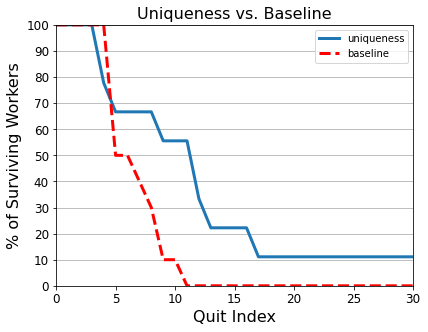

In [39]:
fig, ax = plt.subplots(figsize=(6.4, 4.8))
plt.xticks(np.arange(0, 31, step=5), fontsize=12)
plt.yticks(np.arange(0, 110, step=10), fontsize=12)
plt.plot(indexes, [100] + list_quit_index_uniqueness_prec_fix, label='uniqueness', linewidth=3)
plt.plot(indexes, [100] + list_quit_index_baseline_prec_fix, label='baseline', color='r', linestyle='dashed', linewidth=3)
plt.xlabel('Quit Index', fontsize=16)
plt.ylabel('% of Surviving Workers', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Uniqueness vs. Baseline', fontsize=16)
plt.legend()
axes = plt.gca()
axes.yaxis.grid()
plt.margins(0)
plt.show();

In [40]:
mean = df_federer_uniqueness['quit_index'].mean()
print (f'Uniqueness mean of quit indexes is: {mean:.6}')
std = df_federer_uniqueness['quit_index'].std()
print (f'Uniqueness std of quit indexes is: {std:.6}')
median = df_federer_uniqueness['quit_index'].median()
print (f'Uniqueness median of quit indexes is: {median}')

Uniqueness mean of quit indexes is: 10.8889
Uniqueness std of quit indexes is: 8.46233
Uniqueness median of quit indexes is: 11.0


## Hypothesis 7

### Two Sided Proportion Test

In [41]:
# baseline
workers_num_baseline = len(df_federer_baseline)
comp_workers_baseline = len(df_federer_baseline[df_federer_baseline['quit_index'] == 30])
percentage_comp_baseline = comp_workers_baseline / workers_num_baseline * 100 
print (f'the percentage of workers how completed al 30 task in the baseline version is: {percentage_comp_baseline}%' )

# uniqueness
workers_num_uniqueness = len(df_federer_uniqueness)
comp_workers_uniqueness = len(df_federer_uniqueness[df_federer_uniqueness['quit_index'] == 30])
percentage_comp_uniqueness = comp_workers_uniqueness / workers_num_uniqueness * 100
print (f'the percentage of workers how completed al 30 task in the uniqueness version is: {percentage_comp_uniqueness}%' )

the percentage of workers how completed al 30 task in the baseline version is: 0.0%
the percentage of workers how completed al 30 task in the uniqueness version is: 11.11111111111111%


In [42]:
# pairwise test TWO-SIDED: uniqueness compared to the  baseline
counts =  [comp_workers_baseline, comp_workers_uniqueness]
nobs = [workers_num_baseline, workers_num_uniqueness]
zstat, pval = proportions_ztest(counts, nobs)
print(f'TWO-SIDED TEST: the stat is: {zstat} and the pval is: {pval}')

TWO-SIDED TEST: the stat is: -1.082977149423218 and the pval is: 0.27881856572687336


In [43]:
# pairwise test ONE-SIDED: uniqueness compared to the  baseline
counts =  [comp_workers_baseline, comp_workers_uniqueness]
nobs = [workers_num_baseline, workers_num_uniqueness]
zstat, pval = proportions_ztest(counts, nobs, alternative='smaller')
print(f'ONE-SIDED TEST: the stat is: {zstat} and the pval is: {pval}')

ONE-SIDED TEST: the stat is: -1.082977149423218 and the pval is: 0.13940928286343668


### GLM

In [44]:
# adding new binary completed column
df_federer_uniqueness['completed'] = np.where(df_federer_uniqueness['quit_index'] == 30, 1, 0)
df_federer_benefit['completed'] = np.where(df_federer_benefit['quit_index'] == 30, 1, 0)


# Enjoyment column
df_federer_uniqueness['enjoyment_avg'] = df_federer_uniqueness.apply(lambda x: ((7 - x['enjoyment_1']) + x['enjoyment_2'] + 
                                                                                x['enjoyment_3'] + (7 - x['enjoyment_4'])) / 4, 
                                                                     axis=1)
df_federer_benefit['enjoyment_avg'] = df_federer_benefit.apply(lambda x: ((7 - x['enjoyment_1']) + x['enjoyment_2'] +
                                                                          x['enjoyment_3'] + (7 - x['enjoyment_4'])) / 4, 
                                                               axis=1)

# Competence column
df_federer_uniqueness['competence_avg'] = df_federer_uniqueness.apply(lambda x: (x['competence_1'] + x['competence_2'] + 
                                                                                 (7 - x['competence_3'])) / 3, axis=1)
df_federer_benefit['competence_avg'] = df_federer_benefit.apply(lambda x: (x['competence_1'] + x['competence_2'] + 
                                                                           (7 - x['competence_3'])) / 3, axis=1)

# Effort column
df_federer_uniqueness['effort_avg'] = df_federer_uniqueness.apply(lambda x: ((7 - x['effort_1']) + x['effort_2']) / 2, axis=1)
df_federer_benefit['effort_avg'] = df_federer_benefit.apply(lambda x: ((7 - x['effort_1']) + x['effort_2']) / 2, axis=1)

In [45]:
# creating the dataframe for glm
df_federer_uniqueness['condition'] = 'federer_uniqueness'
df_federer_benefit['condition'] = 'federer_benefit'

desired_columns = ['completed', 'condition', 'enjoyment_avg', 'competence_avg', 'effort_avg']
df_federer_baseline_to_glm = df_federer_baseline[desired_columns].copy()
df_federer_uniqueness_to_glm = df_federer_uniqueness[desired_columns].copy()
df_federer_benefit_to_glm = df_federer_benefit[desired_columns].copy()

glm_df = pd.concat([df_federer_baseline_to_glm, df_federer_uniqueness_to_glm, df_federer_benefit_to_glm]).reset_index()
glm_df.head()

,index,completed,condition,enjoyment_avg,competence_avg,effort_avg
0,0,0,baseline,1.75,2.000000,6.0
1,1,0,baseline,6.50,6.666667,6.5
2,2,0,baseline,2.00,3.000000,5.0
3,3,0,baseline,0.75,3.666667,4.0
4,4,0,baseline,2.25,4.666667,3.5


In [46]:
# formula = 'completed ~ C(condition)+enjoyment_avg+competence_avg+effort_avg'
# model = smf.glm(formula=formula, data=glm_df, family=sm.families.Binomial())
# result = model.fit()
# print(result.summary())

## Hypothesis 8
prints on Hypothesis 3

### Kruskal-Wallis Test

In [47]:
chi2stat,pval = stats.kruskal(error_rates_baseline, error_rates_uniqueness)
print(f'the chi2stat is: {chi2stat} and the pval is: {pval}')

the chi2stat is: 2.2836698858647932 and the pval is: 0.13074218417183428


## Hypothesis 9

### One Way ANOVA Test

In [48]:
# benefit to others intervention
anova_one_way = f_oneway(quit_index_baseline, quit_index_benefit)
F_stat, pval = anova_one_way
print(f'the F stat is: {F_stat} and the pval is: {pval}')

the F stat is: 0.9581148833738862 and the pval is: 0.34138749686934905


### Histogram

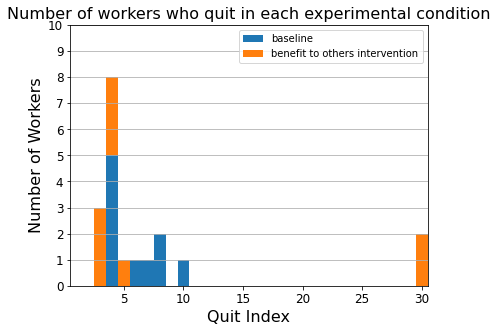

In [49]:
plt.figure(figsize=(6.4, 4.8))
plt.xlabel("Quit Index", fontsize=16)
plt.ylabel("Number of Workers", fontsize=16)
plt.xticks(np.arange(0, 31, step=5), fontsize=12)
plt.yticks(np.arange(0, 20, step=1), fontsize=12)
plt.ylim(top=10, bottom=0)
types = ['baseline', 'benefit to others intervention']
n, bins, patches = plt.hist([quit_index_baseline, quit_index_benefit], bins=range(1,32), align='left', 
                            rwidth=1, stacked=True, density=False, label=types)
plt.title('Number of workers who quit in each experimental condition', fontsize=16)
plt.legend()
axes = plt.gca()
axes.yaxis.grid()
plt.margins(0)
plt.show();

### Retention Curve

In [50]:
zipped_lists = zip(quit_index_baseline, quit_index_benefit)
quit_index_sum = defaultdict(lambda:0)
quit_index_sum_baseline = defaultdict(lambda:0)
quit_index_sum_benefit = defaultdict(lambda:0)
for (x, y) in zipped_lists:
    quit_index_sum[x] += 1
    quit_index_sum[y] += 1
for x in quit_index_baseline:
    quit_index_sum_baseline[x] += 1
for y in quit_index_benefit:
    quit_index_sum_benefit[y] += 1
    
list_quit_index_sum = []
for i in range(1,31):
    list_quit_index_sum.append(quit_index_sum[i])

print(f"{list_quit_index_sum=}")
print(f'most common quiting indexes overall are: 3,4,8')
print(f'baseline: 3- {quit_index_sum_baseline[3]}, 4- {quit_index_sum_baseline[4]}, 8- {quit_index_sum_baseline[8]}')
print(f'benefit: 3- {quit_index_sum_benefit[3]}, 4- {quit_index_sum_benefit[4]},8- {quit_index_sum_benefit[8]}')
# print(quit_index_sum_baseline)
# print(quit_index_sum_benefit)

list_quit_index_baseline_prec = []
list_quit_index_benefit_prec = []

workers_num_baseline = len(df_federer_baseline)
workers_num_benefit = len(df_federer_benefit)

for i in range(1,31):
    if i>1:
        list_quit_index_baseline_prec.append((quit_index_sum_baseline[i]+list_quit_index_baseline_prec[-1]))
        list_quit_index_benefit_prec.append((quit_index_sum_benefit[i]+list_quit_index_benefit_prec[-1]))

    else:
        list_quit_index_baseline_prec.append(quit_index_sum_baseline[i])
        list_quit_index_benefit_prec.append(quit_index_sum_benefit[i])

# fixing lists: moving all cells' values to the right- we have in each cell the num of workers that their quit index is the 
# number of the cell (i.e. the number of participants who completed #cell tasks included), so they still did the current task 
# and should be included in the percentage of workers who continue working on the task
list_quit_index_baseline_prec_fix = [0]
list_quit_index_benefit_prec_fix = [0]
for i in range(0, len(list_quit_index_baseline_prec) - 1):
    list_quit_index_baseline_prec_fix.append(list_quit_index_baseline_prec[i])
    list_quit_index_benefit_prec_fix.append(list_quit_index_benefit_prec[i])
    
for i in range(29):
    list_quit_index_baseline_prec_fix[i] = 100 - (list_quit_index_baseline_prec_fix[i]/workers_num_baseline) * 100
    list_quit_index_benefit_prec_fix[i] = 100 - (list_quit_index_benefit_prec_fix[i]/workers_num_benefit) * 100

list_quit_index_baseline_prec_fix[-1] = list_quit_index_baseline_prec_fix[-2]
list_quit_index_benefit_prec_fix[-1] = list_quit_index_benefit_prec_fix[-2]

print(f'Remaining percantages for Baseline: \n'
      f'{[round(i, 3) for i in list_quit_index_baseline_prec_fix]}')
print(f'Remaining percantages for Benefit: \n'
      f'{[round(i, 3) for i in list_quit_index_benefit_prec_fix]}')

list_quit_index_sum=[0, 0, 3, 7, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
most common quiting indexes overall are: 3,4,8
baseline: 3- 0, 4- 5, 8- 2
benefit: 3- 3, 4- 3,8- 0
Remaining percantages for Baseline: 
[100.0, 100.0, 100.0, 100.0, 50.0, 50.0, 40.0, 30.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Remaining percantages for Benefit: 
[100.0, 100.0, 100.0, 66.667, 33.333, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222, 22.222]


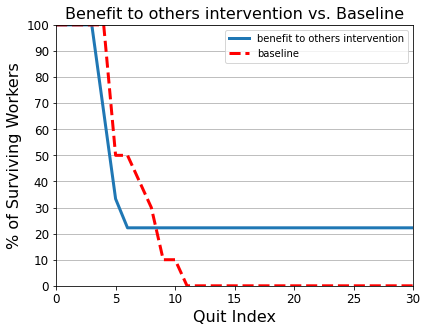

In [51]:
fig, ax = plt.subplots(figsize=(6.4, 4.8))
plt.xticks(np.arange(0, 31, step=5), fontsize=12)
plt.yticks(np.arange(0, 110, step=10), fontsize=12)
plt.plot(indexes, [100] + list_quit_index_benefit_prec_fix, label='benefit to others intervention', linewidth=3)
plt.plot(indexes, [100] + list_quit_index_baseline_prec_fix, label='baseline', color='r', linestyle='dashed', linewidth=3)
plt.xlabel('Quit Index', fontsize=16)
plt.ylabel('% of Surviving Workers', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Benefit to others intervention vs. Baseline', fontsize=16)
plt.legend()
axes = plt.gca()
axes.yaxis.grid()
plt.margins(0)
plt.show();

In [52]:
mean = df_federer_benefit['quit_index'].mean()
print (f'Benefit mean of quit indexes is: {mean:.6}')
std = df_federer_benefit['quit_index'].std()
print (f'Benefit std of quit indexes is: {std:.6}')
median = df_federer_benefit['quit_index'].median()
print (f'Benefit median of quit indexes is: {median}')

Benefit mean of quit indexes is: 9.55556
Benefit std of quit indexes is: 11.6094
Benefit median of quit indexes is: 4.0


## Hypothesis 10

### Two Sided Proportion Test

In [53]:
# baseline
workers_num_baseline = len(df_federer_baseline)
comp_workers_baseline = len(df_federer_baseline[df_federer_baseline['quit_index'] == 30])
percentage_comp_baseline = comp_workers_baseline / workers_num_baseline * 100 
print (f'the percentage of workers how completed al 30 task in the baseline version is: {percentage_comp_baseline}%' )

# benefit
workers_num_benefit = len(df_federer_benefit)
comp_workers_benefit = len(df_federer_benefit[df_federer_benefit['quit_index'] == 30])
percentage_comp_benefit = comp_workers_benefit / workers_num_benefit * 100
print (f'the percentage of workers how completed al 30 task in the benefit version is: {percentage_comp_benefit}%' )

the percentage of workers how completed al 30 task in the baseline version is: 0.0%
the percentage of workers how completed al 30 task in the benefit version is: 22.22222222222222%


In [54]:
# pairwise test TWO-SIDED: benefit compared to the  baseline
counts =  [comp_workers_baseline, comp_workers_benefit]
nobs = [workers_num_baseline, workers_num_benefit]
zstat, pval = proportions_ztest(counts, nobs)
print(f'TWO-SIDED TEST: the stat is: {zstat} and the pval is: {pval}')

TWO-SIDED TEST: the stat is: -1.5759632390125584 and the pval is: 0.1150342753831828


In [55]:
# pairwise test ONE-SIDED: benefit compared to the  baseline
counts =  [comp_workers_baseline, comp_workers_benefit]
nobs = [workers_num_baseline, workers_num_benefit]
zstat, pval = proportions_ztest(counts, nobs, alternative='smaller')
print(f'ONE-SIDED TEST: the stat is: {zstat} and the pval is: {pval}')

ONE-SIDED TEST: the stat is: -1.5759632390125584 and the pval is: 0.0575171376915914


### GLM

Not working like in uniqueness

## Hypothesis 11
prints on Hypothesis 3

### Kruskal-Wallis Test

In [56]:
chi2stat,pval = stats.kruskal(error_rates_baseline, error_rates_benefit)
print(f'the chi2stat is: {chi2stat} and the pval is: {pval}')

the chi2stat is: 0.10666666666666913 and the pval is: 0.7439714780750541


# Demographic Recommender System


In [57]:
desired_columns = ['age', 'gender', 'What is your Education Level:','quit_index', 'condition']
df_federer_baseline.replace({'condition': {'baseline': 'federer_baseline'}}, inplace=True)
df_federer_question.replace({'condition': {'question': 'federer_question'}}, inplace=True)
df_federer_narrative.replace({'condition': {'narrative': 'federer_narrative'}}, inplace=True)

df_federer_baseline_demographics = df_federer_baseline[desired_columns]
df_federer_question_demographics = df_federer_question[desired_columns]
df_federer_narrative_demographics = df_federer_narrative[desired_columns]
df_federer_demographics = pd.concat([df_federer_baseline_demographics, df_federer_question_demographics, 
                                     df_federer_narrative_demographics])
df_federer_demographics.head()

,age,gender,What is your Education Level:,quit_index,condition
0,67,Female,High school education,8,federer_baseline
1,48,Male,Bachelorג€™s or equivalent level of education,4,federer_baseline
2,18,Female,High school education,7,federer_baseline
3,50,Female,Masterג€™s+ or equivalent level of education,6,federer_baseline
4,25,Female,Other,10,federer_baseline


In [58]:
df_federer_demographics = df_federer_demographics.rename(columns={'What is your Education Level:': 'Education Level'})
df_federer_demographics = df_federer_demographics.replace({'High school education': 'High school','Bachelorג€™s or equivalent level of education':'Bachelor',
                                'Masterג€™s+ or equivalent level of education':'Master'})

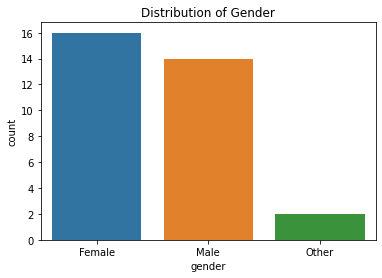

In [59]:
sns.countplot(x='gender', data=df_federer_demographics);
plt.title('Distribution of Gender');

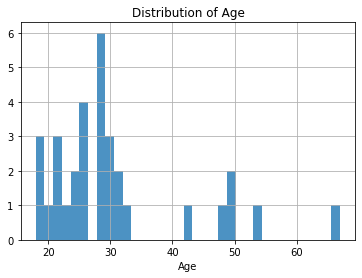

In [60]:
df_federer_demographics.hist('age', bins=35, alpha=0.8);
plt.title('Distribution of Age');
plt.xlabel('Age');

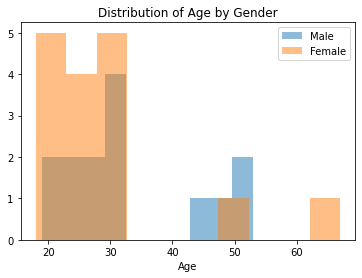

In [61]:
plt.hist('age', data=df_federer_demographics[df_federer_demographics['gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('age', data=df_federer_demographics[df_federer_demographics['gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

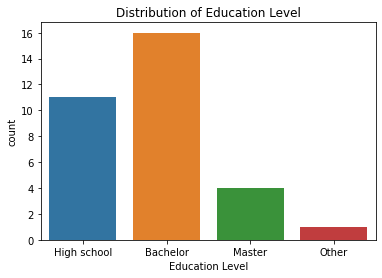

In [62]:
sns.countplot(x='Education Level', data=df_federer_demographics);
plt.title('Distribution of Education Level');

In [63]:
df_federer_demographics['gender']= df_federer_demographics['gender'].map({'Female':1, 'Male':0,'Other':2})
df_federer_demographics['Education Level']= df_federer_demographics['Education Level'].map({'High school':1, 'Bachelor':2, 'Master':3, 'Other':0})
df_federer_demographics['condition']= df_federer_demographics['condition'].map({'federer_baseline':0, 'federer_question':1, 'federer_narrative':2})
df_federer_demographics = df_federer_demographics.replace(np.nan, 0)
df_federer_demographics

,age,gender,Education Level,quit_index,condition
0,67,1,1,8,0
1,48,0,2,4,0
2,18,1,1,7,0
3,50,1,3,6,0
4,25,1,0,10,0
5,31,0,2,8,0
6,22,1,1,4,0
7,24,1,2,4,0
8,28,0,1,4,0
9,21,1,2,4,0


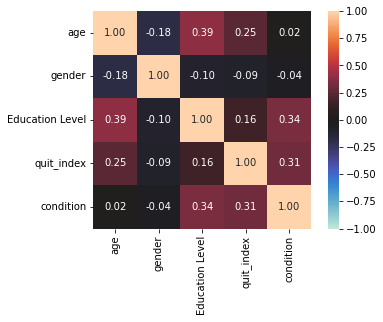

{'corr':                       age    gender  Education Level  quit_index  condition
 age              1.000000 -0.180191         0.387705    0.248630   0.018487
 gender          -0.180191  1.000000        -0.099913   -0.091543  -0.040248
 Education Level  0.387705 -0.099913         1.000000    0.157243   0.338010
 quit_index       0.248630 -0.091543         0.157243    1.000000   0.308837
 condition        0.018487 -0.040248         0.338010    0.308837   1.000000,
 'ax': <AxesSubplot:>}

In [64]:
associations(df_federer_demographics)

In [65]:
age = df_federer_demographics['age']
gender = df_federer_demographics['gender']
education = df_federer_demographics['Education Level']
y = df_federer_demographics['quit_index']
print(len(y), len(gender))

32 32


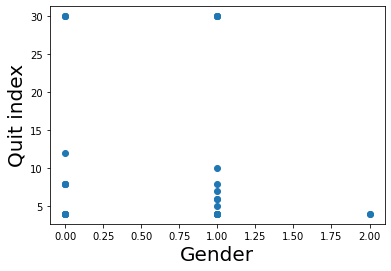

In [66]:
plt.scatter(gender,y)
 
plt.xlabel('Gender',fontsize = 20)
 
plt.ylabel('Quit index', fontsize = 20)
 
plt.show()

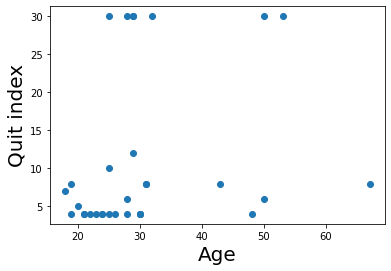

In [67]:
plt.scatter(age,y)
 
plt.xlabel('Age',fontsize = 20)
 
plt.ylabel('Quit index', fontsize = 20)
 
plt.show()

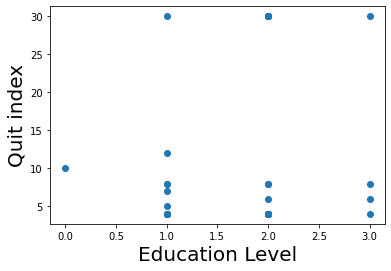

In [68]:
plt.scatter(education,y)
 
plt.xlabel('Education Level',fontsize = 20)
 
plt.ylabel('Quit index', fontsize = 20)
 
plt.show()

## Quit index

In [69]:
X = df_federer_demographics[['age', 'gender', 'Education Level', 'condition']].to_numpy()
X = np.c_[  np.ones(len(X)), X]

y = df_federer_demographics['quit_index'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
n = len(y_train)
C = np.linalg.inv(np.matmul(X_train.T, X_train))
beta_hat_linear = np.matmul(np.matmul(C, X_train.T), y_train)
# np.set_printoptions(precision=4)
print(f'beta_hat={beta_hat_linear} and n={n}')

beta_hat=[ 4.81600933  0.13380272 -0.55647583 -1.14092844  3.48587525] and n=24


In [70]:
# SST
y_mean = np.mean(y_test)
SST = np.sum((y_test - y_mean) ** 2)
MST = SST / (n-1)
# print(f'MST={MST:.4f} and SST={SST:.4f}')

# SSRes
y_hat = np.matmul(X_test, beta_hat_linear)
e = y_test - y_hat
n, p = X_test.shape
SS_RES = np.sum(e **2 )
MS_RES = SS_RES / (n-p)
# print(f'MSRes={MS_RES:.4f} and SSRes={SS_RES:.4f}')

# SSR
SSR = SST - SS_RES
MSR = SSR / (p - 1)
# print(f'MSR={MSR:.4f} and SSR={SSR:.4f}')

# F test
F = MSR / MS_RES
p_value = 1 - f.cdf(abs(F), p-1, n-p)
# print(f'F={F:.4f} and p-value={p_value:.5f}')
R_squared = 1 - SS_RES / SST
MSE = R_squared * MST
print(f'MSE={MSE}')
R_squared_adj = 1 - ((n - 1) / (n - p)) * (1 - R_squared)
print(f'R_squared={R_squared:.4f}')
print(f'R_squared_adj={R_squared_adj:.4f}')

MSE=6.888338055195224
R_squared=0.1316
R_squared_adj=-1.0262


In [71]:
# ANOVA dataframe
ANOVA = pd.DataFrame({'SS': [SST, SS_RES, SSR], 'df': [p - 1, n - p, n - 1], 'MS': [MST, MS_RES, MSR], 
                      'F': [F, None, None], 'p_value': [p_value, None, None]}, index=['Reg', 'Res', 'Total'])
ANOVA = ANOVA.style.set_caption("ANOVA")
ANOVA

,SS,df,MS,F,p_value
Reg,1203.500000,4,52.326087,0.113700,0.968970
Res,1045.068225,3,348.356075,nan,nan
Total,158.431775,7,39.607944,nan,nan


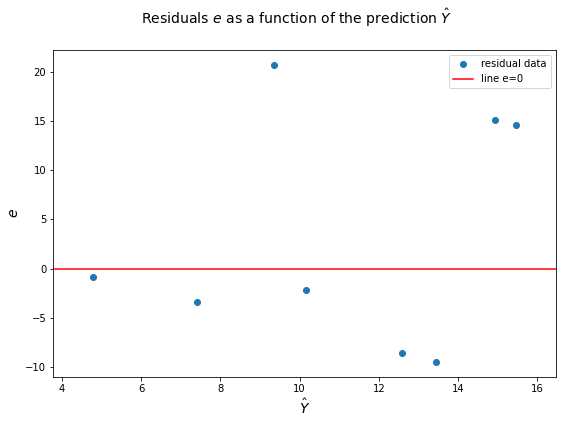

In [72]:
min_val = min(min(y_hat), min(e))
max_val = max(max(y_hat), max(e))
min_y_hat = min(y_hat)
max_y_hat = max(y_hat)
fig, ax = plt.subplots(figsize=(9,6))
fig.suptitle('Residuals $e$ as a function of the prediction $\hatY$', fontsize=14)
ax.plot(y_hat, e, 'o', label='residual data')
plt.plot([min_val-1, max_val+1], [0, 0], color='r', label='line e=0')
plt.xlim(min_y_hat-1, max_y_hat+1)
plt.ylabel('$e$', fontsize=14)
plt.xlabel('$\hatY$', fontsize=14)
plt.legend()
plt.show();